In [1]:
#import libraries
import pandas as pd
import numpy as np
pd.options.display.max_columns = None

#Get the URLs from fbref
urls = ["https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats",
"https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats",
"https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats",
"https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats",
"https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats",
"https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats",
"https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats"]

#get data from different tables of fbref
redundant = ['Rk', 'Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', '90s', 'Matches']

#create dataframes
general = pd.read_html((urls[0]),header=1)[0].drop(['Rk', 'Matches'],axis=1)
shooting = pd.read_html((urls[1]), header=1)[0].drop(redundant, axis=1)
passing = pd.read_html((urls[2]), header=1)[0].drop(redundant,axis=1)
passing_types = pd.read_html((urls[3]), header=1)[0].drop(redundant,axis=1)
gca = pd.read_html((urls[4]), header=1)[0].drop(redundant,axis=1)
defense= pd.read_html((urls[5]), header=1)[0].drop(redundant,axis=1)
possession= pd.read_html((urls[6]), header=1)[0].drop(redundant,axis=1)

#appending table no before the column name to avoid confusion
def renameColumns(table_no, df):
    num = str(table_no) + "_"
    return df.rename(columns = lambda x: num + x)

shooting = renameColumns(2, shooting)
passing = renameColumns(3, passing)
passing_types = renameColumns(4, passing_types)
gca = renameColumns(5, gca)
defense = renameColumns(6, defense)
possession = renameColumns(7, possession)

#combining all the tables into one dataframe
df = pd.concat([general, shooting, passing, passing_types, gca, defense, possession], axis=1)

#copy the dataframe to a new dataframe
df_copy = df.copy()

#convert columns to numeric
for i in range(7, len(df_copy.columns)):
    df_copy[df_copy.columns[i]] = pd.to_numeric(df_copy[df_copy.columns[i]], errors='coerce')

#drop the columns that are not needed
df_copy = df_copy.drop(['G-PK', 'PK', 'PKatt', 'npxG+xA', '2_Gls', '2_Sh', '2_SoT', '2_SoT%', '2_G/Sh', '2_G/SoT', '2_PK', '2_PKatt', '2_xG', '2_npxG', '2_npxG/Sh', '2_G-xG',	'2_np:G-xG', '3_Cmp%',	'3_TotDist', '3_Cmp%.1',	'3_Cmp%.2',	'3_Cmp%.3',	'3_Ast','3_xA',	'3_A-xA', '4_In',	'4_Out',	'4_Str', '4_Ground',	'4_Low',	'4_High', '4_TI',	'4_Other',	'4_Cmp',	'4_Off',	'4_Out.1',	'4_Int',	'4_Blocks', '5_PassLive',	'5_PassDead',	'5_Drib',	'5_Sh',	'5_Fld',	'5_Def',	'5_GCA',	'5_GCA90',	'5_PassLive.1',	'5_PassDead.1',	'5_Drib.1',	'5_Sh.1',	'5_Fld.1',	'5_Def.1', '6_Tkl',	'6_TklW',	'6_Def 3rd',	'6_Mid 3rd',	'6_Att 3rd',	'6_Tkl.1',	'6_Att','6_Tkl%', '6_Def 3rd.1',	'6_Mid 3rd.1',	'6_Att 3rd.1', '6_Sh',	'6_ShSv',	'6_Pass', '7_Targ',	'7_Rec',	'7_Rec%',	'7_Prog.1', 'G+A',	'G-PK.1',	'G+A-PK', '4_Att', '4_FK',	'4_TB', '4_Sw', '4_Head', '5_SCA', '7_Live',
'7_TotDist',	'7_PrgDist',	'7_CPA',	'7_Mis',	'7_Dis', '7_#Pl' ], axis=1)

In [2]:
#rename the columns
df_copy.rename(columns={"Pos": "Position",
                        "MP": "Matches",
                        "Min": "Minutes",  
                        "Gls": "Goals",
                        "Gls.1": "Goals p90", 
                        "Ast":"Assists",
                        "Ast.1": "Assists p90",
                        "xG.1" : "xG p90", 
                        "xG+xA": "xG+xA p90", 
                        "npxG.1": "npxG p90",
                        "npxG+xA.1": "npxG+xA p90",
                        "Comp": "Competition",
                        '2_Dist': 'Shot Distance',
                        "CrdY": "Yellow Cards",
                        "CrdR": "Red Cards", 
                        "2_FK": "Freekicks p90",
                        "2_SoT/90": "SOT p90", 
                        "2_Sh/90": "Shots p90",
                        "xA.1" : "xA p90",  
                        "3_Cmp":"Passes Completed", 
                        "3_Prog": "Progressive Passes",
                        "3_Cmp.1": "Short Passes Completed",	
                        "3_Att.1": "Short Passes Attempted",
                        "3_Cmp.2": "Medium Passes Completed",
                        "3_Att.2": "Medium Passes Attempted",
                        "3_Cmp.3": "Long Passes Completed",	
                        "3_Att.3": "Long Passes Attempted",
                        "3_1/3":"1/3rds", 
                        "3_KP":"Key Passes",
                        "3_Att":"Passes Attempted",
                        "3_PPA":"Passes in 18 yards",
                        "3_CrsPA" :"Crosses in 18 yards",
                        "3_PrgDist": "Progressive Passes Distance",
                        "4_Live": "Live passes",
                        "4_Dead": "Dead passes",   
                        "4_Crs": "Crosses",
                        "4_CK": "Corners", 
                        "4_Left":"Left Foot Passes",
                        "4_Right":"Right Foot Passes",
                        "4_Head":"Head Passes",
                        "4_Press": "Press passes",
                        "5_SCA90": "Shot-Creating Actions p90",    
                        "6_Press" : "Pressures",
                        "6_Succ" : "Succ. Pressure",
                        "6_%" : "Pressure %",
                        "6_Blocks" : "Blocks",
                        "6_Int":"Interceptions", 
                        "6_Tkl+Int":"Tackles + Interceptions",
                        "6_Clr":"Clearances", 
                        "6_Err":"Errors",
                        "6_Past": "Dribbled Past",
                        "7_Touches":"Touches", 
                        "7_Def Pen": "Touches in def pen area",
                        "7_Def 3rd": "Touches in def 3rd area",
                        "7_Mid 3rd": "Touches in mid 3rd area",
                        "7_Att 3rd": "Touches in att 3rd area", 
                        "7_Att Pen": "Touches in att pen area",
                        "7_Att": "Dribbles Attempted",
                        "7_Succ": "Successful Dribbles",
                        "7_Succ%": "Successful Dribbles %",
                        "7_Megs" :"Megs", 
                        "7_Carries": "Carries", 
                        "7_Prog": "Progressive Carries",
                        "7_1/3": "Carries into 1/3rd"}, inplace=True)

In [3]:
#drop na values
df_copy.dropna(inplace=True)

df_copy['Age'] = df_copy['Age'].str.split('-').str[0]
#convert age to numeric
df_copy['Age'] = pd.to_numeric(df_copy['Age'], errors='coerce')
df_copy['Born'] = pd.to_numeric(df_copy['Born'], errors='coerce')

In [4]:
#if Left Foot Passes > Right Foot Passes, then it is a Left Footer
df_copy['Prefered Foot'] = np.where(df_copy['Left Foot Passes'] > df_copy['Right Foot Passes'], 'Left', 'Right')

In [5]:
#get unique squad 
squad = df_copy['Squad'].unique()

In [6]:
#rename Competition eng Premier League to Premier League, fr Ligue 1 to Ligue 1, 
#and Spain to La Liga
df_copy['Competition'] = df_copy['Competition'].replace(['eng Premier League', 'fr Ligue 1', 'es La Liga', 'de Bundesliga', 'it Serie A'], ['Premier League', 'Ligue 1', 'La Liga', 'Bundesliga', 'Serie A'])

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#remove position GK
df_copy = df_copy[df_copy['Position'] != 'GK']

<ipython-input-8-eea54afc422b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(ax0.get_xticklabels(), size=20, fontname = 'Trebushet MS', weight = 'bold')
findfont: Font family ['Trebushet MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebushet MS'] not found. Falling back to DejaVu Sans.


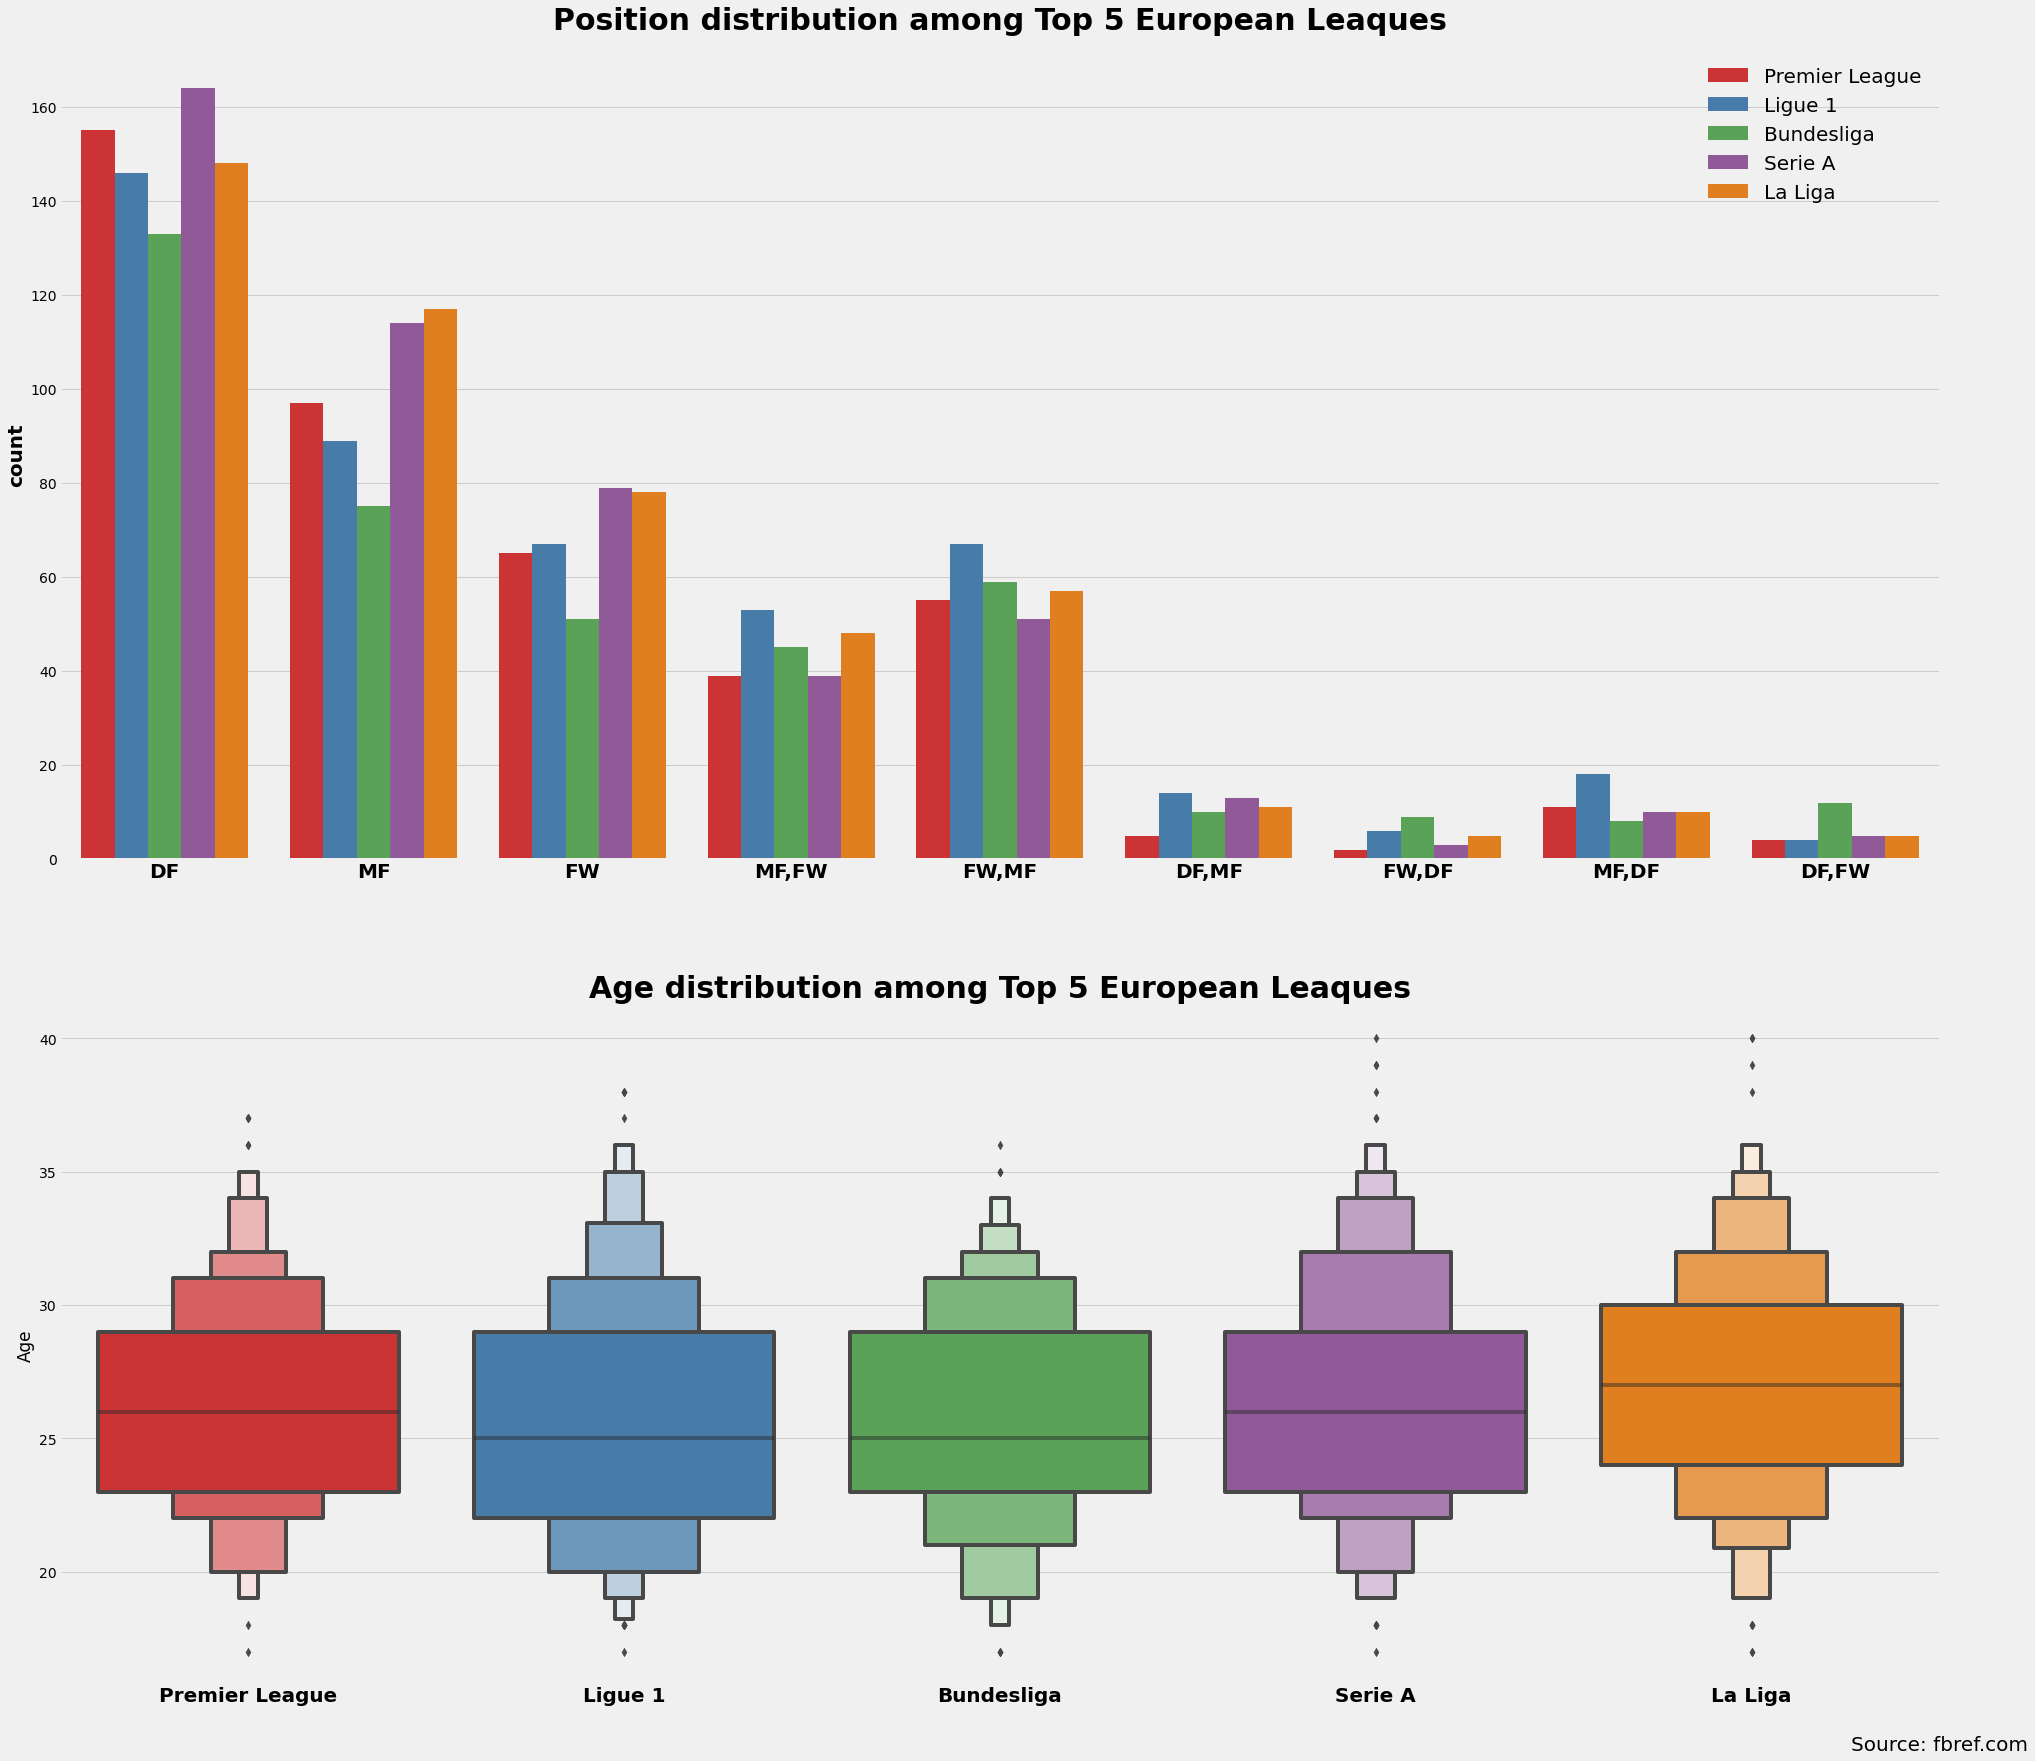

In [8]:
#combine Position Distribution and Age Distribution graphs into one using gridspec
import matplotlib.gridspec as gridspec

plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(30,28))

gs = gridspec.GridSpec(2, 1, height_ratios=[3, 2.5])

#Position Distribution
ax0 = fig.add_subplot(gs[0])
ax0.set_title('Position distribution among Top 5 European Leaques', size=30, fontname = 'Trebushet MS', pad = 20, weight = 'bold')

#xlabel off
#xticks size
ax0.set_xticklabels(ax0.get_xticklabels(), size=20, fontname = 'Trebushet MS', weight = 'bold')
ax0.set_ylabel ('Number of players', size=20, fontname = 'Trebushet MS', weight = 'bold')
ax = sns.countplot (x="Position", hue='Competition', data=df_copy, palette='Set1')
ax0.set_xlabel('')
ax.legend(loc='upper right', ncol=1, frameon=False, fontsize=20)

#padding between subplots
plt.subplots_adjust(hspace=0.2)


#Age Distribution
ax1 = fig.add_subplot(gs[1])
ax1.set_title('Age distribution among Top 5 European Leaques', size=30, fontname = 'Trebushet MS', pad = 10, weight = 'bold')
ax = sns.boxenplot(x='Competition', y='Age', data=df_copy, palette='Set1')
ax1.set_xlabel('')

#xticks size
ax1.set_xticklabels(ax1.get_xticklabels(), size=20, fontname = 'Trebushet MS', weight = 'bold')

#source of data and padding 
ax1.text(1, -0.1, 'Source: fbref.com', size=20, ha='center', transform=ax1.transAxes)


plt.savefig('Top5_Leagues_Position_Age_Distribution.png', dpi=300, bbox_inches='tight', pad_inches=0.5)



In [9]:
#convert object to string
df_copy['Competition'] = df_copy['Competition'].astype(str)


In [10]:
df_copy['Player ID'] = df_copy['Player'] + ' ' + df_copy['Squad']

In [11]:
#get percentile rank of each columns except the following
df_rank = df_copy.drop(['Player', 'Nation', 'Position', 'Squad', 'Competition', 'Age', 'Born', 'Minutes', 'Matches', 'Starts', '90s', 'Prefered Foot', 'Player ID'], axis=1)

#using for loop to get percentile rank of each columns
for i in df_rank.columns:
    df_rank[i] = df_rank[i].rank(pct=True)
    

In [12]:
#add player, nation, position, squad, competition, age and born to df_rank
df_rank = pd.concat([df_copy['Player'], df_copy['Nation'], df_copy['Position'], df_copy['Squad'], df_copy['Competition'], df_copy['Age'], df_copy['Born'], df_copy['Minutes'], df_copy['Matches'], df_copy['Starts'], df_copy['90s'], df_copy['Prefered Foot'], df_copy['Player ID'], df_rank], axis=1)

In [13]:
#minimumn 90s should be greater than 5
df_rank = df_rank[df_rank['90s'] > 10]
df_rank.sort_values(by='xG', ascending=False, inplace=True)

In [14]:
#drop the columns for PCA
df_rank = df_copy.drop(['Player', 'Nation', 'Position', 'Squad', 'Competition', 'Age', 'Born', 'Minutes', 'Matches', 'Starts', '90s', 'Prefered Foot', 'Player ID'], axis=1)

In [15]:
df_rank.shape

(2256, 62)

In [16]:
#using df_rank do a PCA and then find similar players using cosine similarity
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

#normalize the data
scaler = StandardScaler()
scaler.fit(df_rank)
X_scaled = scaler.transform(df_rank)

#perform PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

#get the PCA components
pca_components = pca.components_

#get the variance explained by each component
explained_variance = pca.explained_variance_ratio_

#get the transformed data
transformed_data = pd.DataFrame(X_pca)

#get the transformed data
transformed_data = pd.DataFrame(X_pca)

#get the cosine similarity of the transformed data
cosine_similarity = cosine_similarity(transformed_data)

#join PLayer ID to cosine similarity
df_copy.reset_index(inplace=True)
cosine_similarity_df = pd.DataFrame(cosine_similarity, index=df_copy['Player ID'])


In [17]:
#function to get similar players with Age Range
def get_similar_players(player_id, age_range):
    similar_players = cosine_similarity_df.loc[player_id].sort_values(ascending=False)[0:6]
    similar_players = similar_players[similar_players > 0.7]
    similar_players = similar_players.index.tolist()
    similar_players = [x for x in similar_players if df_copy.loc[x, 'Age'] <= age_range and df_copy.loc[x, 'Age'] >= (age_range - 10)]
    return similar_players, df_copy.loc[similar_players, ['Player', 'Competition', 'Squad', 'Age', 'Matches', 'Position', 'Prefered Foot', 'Goals', 'xG', 'Assists', 'Key Passes']]

In [18]:
#Player name with Age Range
result = get_similar_players('Kai Havertz Chelsea', 30)

#result to a dataframe
result_df = pd.DataFrame(result[1])
result_df

,Player,Competition,Squad,Age,Matches,Position,Prefered Foot,Goals,xG,Assists,Key Passes
883,Kai Havertz,Premier League,Chelsea,22,29.0,"FW,MF",Left,8.0,9.7,3.0,20.0
1530,Arnaud Nordin,Ligue 1,Saint-Étienne,23,36.0,"FW,MF",Left,4.0,4.9,4.0,22.0
1811,Julian Ryerson,Bundesliga,Union Berlin,24,28.0,DF,Right,2.0,1.6,0.0,17.0
895,Benjamin Henrichs,Bundesliga,RB Leipzig,25,22.0,DF,Right,3.0,1.7,3.0,14.0
1460,Steve Mounié,Ligue 1,Brest,27,35.0,FW,Right,9.0,11.8,2.0,16.0
1027,Juanmi,La Liga,Betis,29,33.0,FW,Right,16.0,11.8,4.0,19.0


In [19]:
# df_copy.to_excel('Top5_European_Leaques_Player_Data.xlsx', index=False)